# Matched catalogues

Notebook to create the matched catalogues that we will analyze later : match between UNIONS galaxy shape survey and the SDSS and DESI spectroscopic surveys. 

This catalogue will be used then to measure intrinsic alignment by knowing shapes and redshifts of galaxies

In [16]:
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy.coordinates import concatenate
from astropy import units as u

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

### BOSS survey (SDSS)

CMASS galaxies : data

In [2]:
# Northern hemisphere
cmass_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/SDSS/BOSS/galaxy_DR12v5_CMASS_North.fits')

names = [name for name in cmass_table.colnames if len(cmass_table[name].shape) <= 1]
filtered_tbl = cmass_table[names]

cmass_north = filtered_tbl.to_pandas()
cmass_north.columns




# Southern hemisphere
cmass_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/SDSS/BOSS/galaxy_DR12v5_CMASS_South.fits')

names = [name for name in cmass_table.colnames if len(cmass_table[name].shape) <= 1]
filtered_tbl = cmass_table[names]

cmass_south = filtered_tbl.to_pandas()
cmass_south.columns




# Combination of northern and southern hemisphere
cmass = pd.concat([cmass_north, cmass_south], ignore_index=True)

table = Table.from_pandas(cmass)
table.write('CMASS_data_NGC+SGC.fits', format="fits", overwrite=True)

In [14]:
cmass

,RA,DEC,RUN,RERUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
0,129.176188,48.946499,1302,b'301 ',1,157,512,2,2657,270,...,0.000373,0.936170,3696,69,55277,2,10128,0,11633,1
1,117.416963,39.276759,1302,b'301 ',3,71,628,2,5773,146,...,0.000029,1.000000,3672,201,55484,2,10106,0,20169,1
2,116.912724,39.443311,1302,b'301 ',4,71,518,2,5773,146,...,0.000376,1.000000,3672,323,55484,2,10106,0,31760,1
3,116.950172,39.490769,1302,b'301 ',4,71,656,2,5773,146,...,0.000408,1.000000,3672,331,55484,2,10106,0,23010,2
4,117.528471,40.176493,1302,b'301 ',4,77,199,2,5773,146,...,0.000371,1.000000,3672,195,55484,2,10106,0,23873,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849632,318.441056,2.587774,7717,b'301 ',6,52,784,21,29117,6103,...,0.000269,0.989247,5141,789,55746,39,13636,0,1937,1
849633,318.481439,2.638898,7717,b'301 ',6,52,1237,21,29117,6103,...,0.000262,0.989247,5141,825,55746,39,13636,0,1271,1
849634,318.416126,2.764827,7717,b'301 ',6,52,1518,21,29117,6103,...,0.000084,0.989247,5141,781,55746,39,13636,0,1905,2
849635,318.383511,2.759699,7717,b'301 ',6,52,1913,21,29117,6103,...,0.000289,0.989247,5141,787,55746,39,13636,0,1184,1


CMASS galaxies : random

In [3]:
random_cmass_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/SDSS/BOSS/random0_DR12v5_CMASS_North.fits')

names = [name for name in random_cmass_table.colnames if len(random_cmass_table[name].shape) <= 1]
filtered_tbl = random_cmass_table[names]

random_cmass_north = filtered_tbl.to_pandas()
random_cmass_north.columns





random_cmass_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/SDSS/BOSS/random0_DR12v5_CMASS_South.fits')

names = [name for name in random_cmass_table.colnames if len(random_cmass_table[name].shape) <= 1]
filtered_tbl = random_cmass_table[names]

random_cmass_south = filtered_tbl.to_pandas()
random_cmass_south.columns




random_cmass = pd.concat([random_cmass_north, random_cmass_south], ignore_index=True)
random_cmass = random_cmass[:len(cmass)]


table = Table.from_pandas(random_cmass)
table.write('CMASS_random_NGC+SGC.fits', format="fits", overwrite=True)

### DESI survey

LRG (Luminous Red Galaxies) : data

In [4]:
lrg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/LRG_NGC_clustering.dat.fits')

names = [name for name in lrg_table.colnames if len(lrg_table[name].shape) <= 1]
filtered_tbl = lrg_table[names]

lrg_north = filtered_tbl.to_pandas()
lrg_north.columns





lrg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/LRG_SGC_clustering.dat.fits')

names = [name for name in lrg_table.colnames if len(lrg_table[name].shape) <= 1]
filtered_tbl = lrg_table[names]

lrg_south = filtered_tbl.to_pandas()
lrg_south.columns





lrg = pd.concat([lrg_north, lrg_south], ignore_index=True)

table = Table.from_pandas(lrg)
table.write('LRG_data_NGC+SGC.fits', format="fits", overwrite=True)

LRG : random

In [5]:
random_lrg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/LRG_NGC_9_clustering.ran.fits')

names = [name for name in random_lrg_table.colnames if len(random_lrg_table[name].shape) <= 1]
filtered_tbl = random_lrg_table[names]

random_lrg_north = filtered_tbl.to_pandas()
random_lrg_north.columns





random_lrg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/LRG_SGC_9_clustering.ran.fits')

names = [name for name in random_lrg_table.colnames if len(random_lrg_table[name].shape) <= 1]
filtered_tbl = random_lrg_table[names]

random_lrg_south = filtered_tbl.to_pandas()
random_lrg_south.columns





random_lrg = pd.concat([random_lrg_north, random_lrg_south], ignore_index=True)

table = Table.from_pandas(random_lrg)
table.write('LRG_random_NGC+SGC.fits', format="fits", overwrite=True)

ELG (Emission Line Galaxies) : data

In [6]:
elg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/ELG_LOPnotqso_NGC_clustering.dat.fits')

names = [name for name in elg_table.colnames if len(elg_table[name].shape) <= 1]
filtered_tbl = elg_table[names]

elg_north = filtered_tbl.to_pandas()
elg_north.columns






elg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/ELG_LOPnotqso_SGC_clustering.dat.fits')

names = [name for name in elg_table.colnames if len(elg_table[name].shape) <= 1]
filtered_tbl = elg_table[names]

elg_south = filtered_tbl.to_pandas()
elg_south.columns





elg = pd.concat([elg_north, elg_south], ignore_index=True)

table = Table.from_pandas(elg)
table.write('ELG_data_NGC+SGC.fits', format="fits", overwrite=True)

ELG : random

In [7]:
random_elg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/ELG_LOPnotqso_NGC_9_clustering.ran.fits')

names = [name for name in random_elg_table.colnames if len(random_elg_table[name].shape) <= 1]
filtered_tbl = random_elg_table[names]

random_elg_north = filtered_tbl.to_pandas()
random_elg_north.columns






random_elg_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/ELG_LOPnotqso_SGC_9_clustering.ran.fits')

names = [name for name in random_elg_table.colnames if len(random_elg_table[name].shape) <= 1]
filtered_tbl = random_elg_table[names]

random_elg_south = filtered_tbl.to_pandas()
random_elg_south.columns





random_elg = pd.concat([random_elg_north, random_elg_south], ignore_index=True)

table = Table.from_pandas(random_elg)
table.write('ELG_random_NGC+SGC.fits', format="fits", overwrite=True)

BGS (Bright Galaxy Survey) : data

In [8]:
bgs_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/BGS_ANY_NGC_clustering.dat.fits')

names = [name for name in bgs_table.colnames if len(bgs_table[name].shape) <= 1]
filtered_tbl = bgs_table[names]

bgs_north= filtered_tbl.to_pandas()
bgs_north.columns




bgs_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/BGS_ANY_SGC_clustering.dat.fits')

names = [name for name in bgs_table.colnames if len(bgs_table[name].shape) <= 1]
filtered_tbl = bgs_table[names]

bgs_south= filtered_tbl.to_pandas()
bgs_south.columns





bgs = pd.concat([bgs_north, bgs_south], ignore_index=True)

table = Table.from_pandas(bgs)
table.write('BGS_data_NGC+SGC.fits', format="fits", overwrite=True)

BGS : random

In [9]:
random_bgs_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/BGS_ANY_NGC_9_clustering.ran.fits')

names = [name for name in random_bgs_table.colnames if len(random_bgs_table[name].shape) <= 1]
filtered_tbl = random_bgs_table[names]

random_bgs_north= filtered_tbl.to_pandas()
random_bgs_north.columns




random_bgs_table = Table.read('/Users/antonincorinaldi/Documents/stage césure/data/DESI/BGS_ANY_SGC_9_clustering.ran.fits')

names = [name for name in random_bgs_table.colnames if len(random_bgs_table[name].shape) <= 1]
filtered_tbl = random_bgs_table[names]

random_bgs_south= filtered_tbl.to_pandas()
random_bgs_south.columns



random_bgs=random_bgs_north

random_bgs = pd.concat([random_bgs_north, random_bgs_south], ignore_index=True)

table = Table.from_pandas(bgs)
table.write('BGS_random_NGC+SGC.fits', format="fits", overwrite=True)

### Plotting the normalized number density of galaxies for each survey

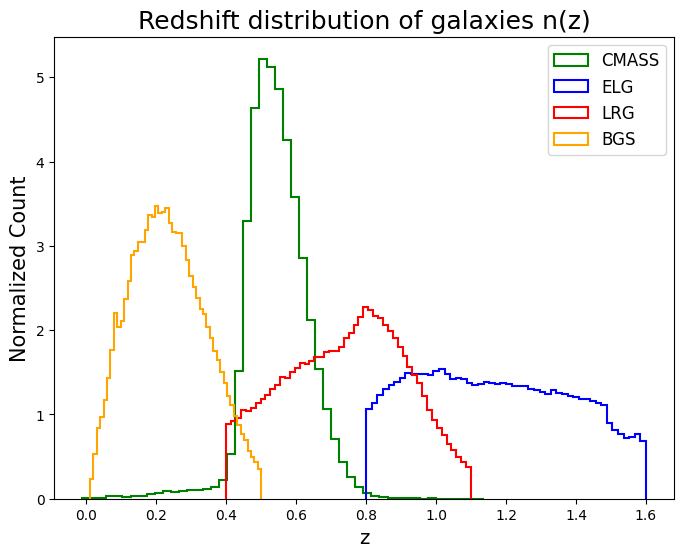

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(cmass['Z'], bins=50, density=True, histtype='step', color='green', linewidth=1.5, label='CMASS')
plt.hist(elg['Z'], bins=50, density=True, histtype='step', color='blue', linewidth=1.5, label='ELG')
plt.hist(lrg['Z'], bins=50, density=True, histtype='step', color='red', linewidth=1.5, label='LRG')
plt.hist(bgs['Z'], bins=50, density=True, histtype='step', color='orange', linewidth=1.5, label='BGS')


plt.xlabel('z', fontsize=14)
plt.ylabel('Normalized Count', fontsize=15)
plt.title('Redshift distribution of galaxies n(z)', fontsize=18)
plt.legend(fontsize=12)

plt.savefig('Redshift_distributions.pdf', bbox_inches='tight')
plt.show()

### UNIONS survey

UNIONS shape catalogue

In [12]:
with fits.open('/Users/antonincorinaldi/Documents/stage césure/data/UNIONS/unions_shapepipe_cut_struc_2024_v1.5.3.fits', memmap=True,ignore_missing_simple=True) as hdul:
    data = hdul[1].data
    selected_columns = ['RA', 'Dec', 'e1', 'e2', 'w_iv']
    unions = pd.DataFrame({col: data[col].byteswap().newbyteorder() for col in selected_columns})

In [13]:
unions

,RA,Dec,e1,e2,w_iv
0,108.370581,59.256291,-0.284876,-0.232650,19.270887
1,108.643083,59.250135,0.195145,0.063940,5.409552
2,107.871739,59.252632,0.159080,0.148219,15.560194
3,108.441349,59.250404,0.180750,-0.529500,13.900764
4,108.198100,59.250262,0.114629,0.160938,13.784805
...,...,...,...,...,...
143256653,332.883595,3.715323,0.672961,-0.679813,20.243125
143256654,332.877082,3.708592,0.472455,0.354313,4.145983
143256655,332.884568,3.742759,0.183444,0.389572,17.846292
143256656,332.874819,3.738361,0.324236,-0.577897,6.224169


Visualization of the galaxy survey


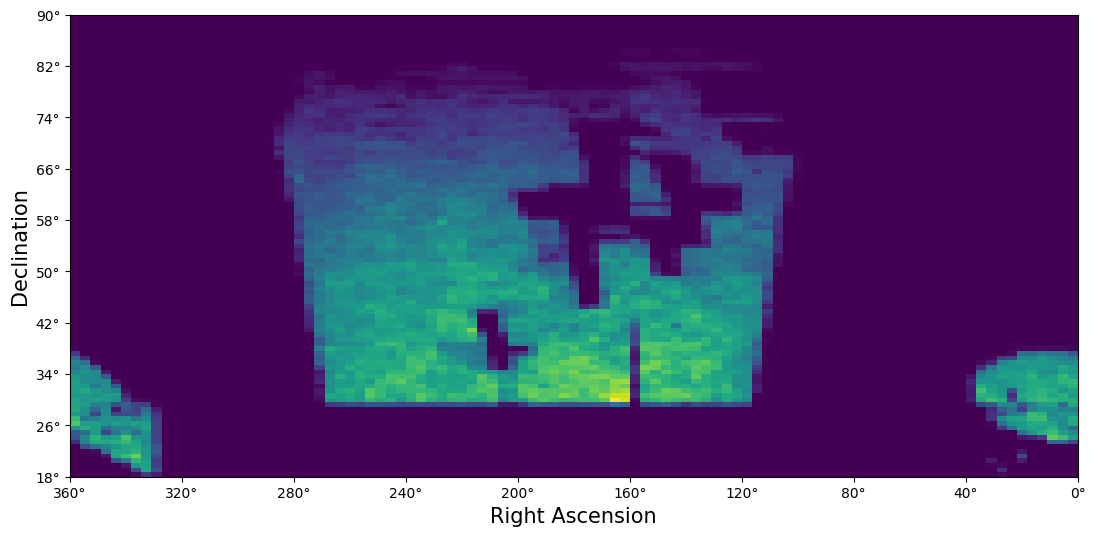

In [17]:
ra_edges = np.linspace(0,360,100)
dec_edges = np.linspace(18,90,100)

unions_survey,_,_ = np.histogram2d(unions['Dec'], unions['RA'], bins=(dec_edges, ra_edges))
unions_survey = unions_survey.T
unions_survey = np.rot90(unions_survey, k=3)


plt.figure(figsize=(13, 6))

plt.imshow(unions_survey, extent=[ra_edges[-1], ra_edges[0], dec_edges[0], dec_edges[-1]], aspect='auto', origin='lower')
plt.xlabel("Right Ascension", fontsize=15)
plt.ylabel("Declination", fontsize=15)


formatter = mticker.FuncFormatter(lambda x, _: f"{int(x)}°")

plt.xticks(np.linspace(ra_edges[-1], ra_edges[0], 10).astype(int))
plt.yticks(np.linspace(dec_edges[0], dec_edges[-1], 10).astype(int)) 

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)   

plt.show()

### Matching procedure

UNIONS-CMASS data

In [ ]:
cat_unions = SkyCoord(ra= unions['RA'], dec=unions['Dec'],unit='deg')
cat_cmass = SkyCoord(ra=cmass['RA'] , dec=cmass['DEC'] , unit='deg')


# Matching
idx, d2d, d3d = match_coordinates_sky(cat_unions, cat_cmass)


# UNIONS-CMASS (Tolerance of 1'')
unions_cmass_cross = unions.loc[d2d.value < 0.00028]

table = Table.from_pandas(unions_cmass_cross)
table.write('unions1.5.3_cmass_cross.fits', format="fits", overwrite=True)



# CMASS-UNIONS (to have the redshift associated to each UNIONS shape)
idx2 = idx[d2d.value < 0.00028]
unions_cmass_crossZ = cmass.loc[idx2]

table = Table.from_pandas(unions_cmass_crossZ)
table.write('unions1.5.3_cmass_crossZ.fits', format="fits", overwrite=True)



# Number of matched objects
nb_unions_cmass = len(unions_cmass_cross)

UNIONS-LRG data

In [ ]:
cat_unions = SkyCoord(ra= unions['RA'], dec=unions['Dec'],unit='deg')
cat_lrg = SkyCoord(ra=lrg['RA'] , dec=lrg['DEC'] , unit='deg')
idx, d2d, d3d = match_coordinates_sky(cat_unions, cat_lrg)

unions_lrg_cross = unions.loc[d2d.value < 0.00028]

table = Table.from_pandas(unions_lrg_cross)
table.write('unions1.5.3_lrg_cross.fits', format="fits", overwrite=True)


idx2 = idx[d2d.value < 0.00028]
unions_lrg_crossZ = lrg.loc[idx2]

table = Table.from_pandas(unions_lrg_crossZ)
table.write('unions1.5.3_lrg_crossZ.fits', format="fits", overwrite=True)



nb_unions_lrg = len(unions_lrg_cross)

UNIONS-ELG data

In [ ]:
cat_unions = SkyCoord(ra= unions['RA'], dec=unions['Dec'],unit='deg')
cat_elg = SkyCoord(ra=elg['RA'] , dec=elg['DEC'] , unit='deg')
idx, d2d, d3d = match_coordinates_sky(cat_unions, cat_elg)

unions_elg_cross = unions.loc[d2d.value < 0.00028]


table = Table.from_pandas(unions_elg_cross)
table.write('unions1.5.3_elg_cross.fits', format="fits", overwrite=True)




idx2 = idx[d2d.value < 0.00028]
unions_elg_crossZ = elg.loc[idx2]

table = Table.from_pandas(unions_elg_crossZ)
table.write('unions1.5.3_elg_crossZ.fits', format="fits", overwrite=True)



nb_unions_elg = len(unions_elg_cross)

UNIONS-BGS data

In [10]:
cat_unions = SkyCoord(ra= unions['RA'], dec=unions['Dec'],unit='deg')
cat_bgs = SkyCoord(ra=bgs['RA'] , dec=bgs['DEC'] , unit='deg')
idx, d2d, d3d = match_coordinates_sky(cat_unions, cat_bgs)

unions_bgs_cross = unions.loc[d2d.value < 0.00028]

table = Table.from_pandas(unions_bgs_cross)
table.write("unions1.5.3_bgs_cross.fits", format="fits", overwrite=True)



idx2 = idx[d2d.value < 0.00028]
unions_bgs_crossZ = bgs.loc[idx2]

table = Table.from_pandas(unions_bgs_crossZ)
table.write("unions1.5.3_bgs_crossZ.fits", format="fits", overwrite=True)



nb_unions_bgs = len(unions_bgs_cross)